In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import normalize

In [2]:
Salary_data = pd.read_csv('C:/Users/karan/Desktop/Projects/Datas/Salary_Data.csv')

In [3]:
Salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
Salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
Salary_data.shape

(30, 2)

In [6]:
Salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
Salary_data.duplicated().sum()

np.int64(0)

In [8]:
cols = Salary_data.columns

YearsExperience


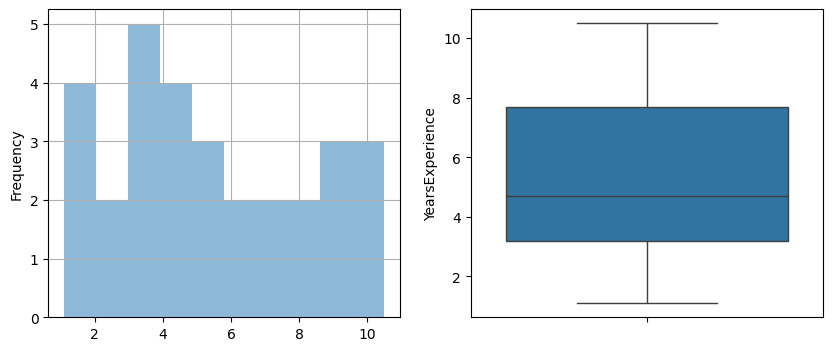

Salary


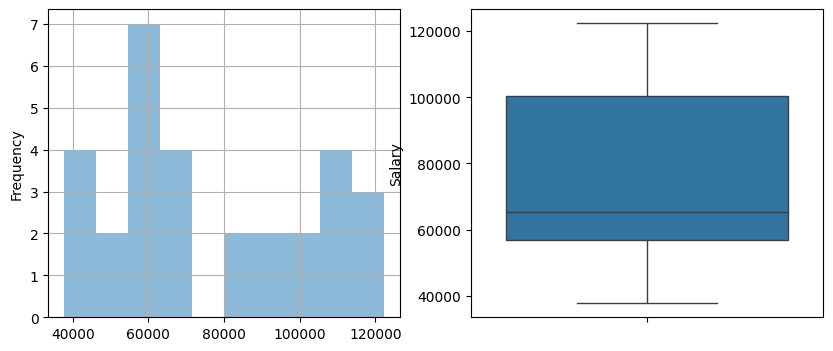

In [9]:
for col in cols:
    print(col)
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    Salary_data[col].hist(bins = 10, alpha = 0.5)
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(y = Salary_data[col])
    plt.show()

In [10]:
x = Salary_data['YearsExperience']
y = Salary_data['Salary']
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()

In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.14e-20
Time:                        17:52:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

In [12]:
y_pred = model.predict(X)

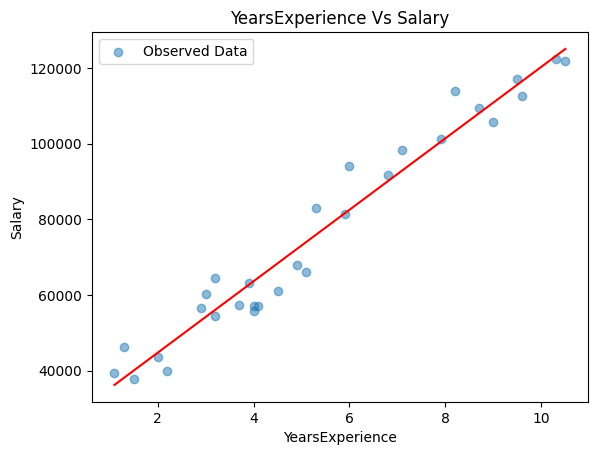

In [13]:
plt.scatter(Salary_data['YearsExperience'], Salary_data['Salary'], alpha = 0.5, label = 'Observed Data')
plt.plot(Salary_data['YearsExperience'], y_pred, color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience Vs Salary')
plt.legend()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = LR_model.predict(X_test)

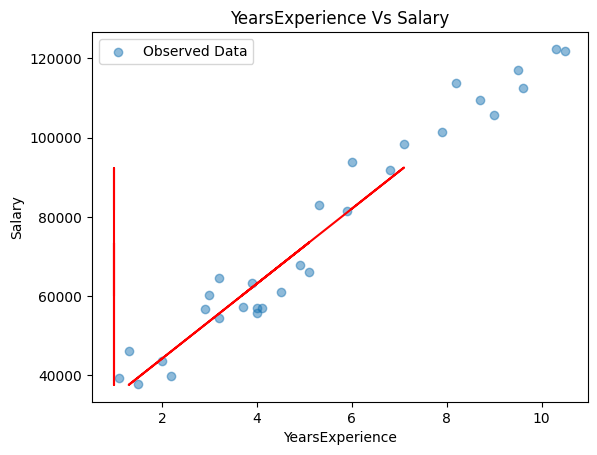

In [17]:
plt.scatter(Salary_data['YearsExperience'], Salary_data['Salary'], alpha = 0.5, label = 'Observed Data')
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience Vs Salary')
plt.legend()

In [18]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {MSE}", MSE)
print("Mean Absolute Error: {MAE}", MAE)
print("R2 Error: {R2}", R2)

Mean Squared Error: {MSE} 53188174.45818887
Mean Absolute Error: {MAE} 6445.222801502555
R2 Error: {R2} 0.8966856684595397
